In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg
import scipy.constants as consts

In [86]:
df = pd.read_csv("Lab2.csv")
df['R'] = df.apply(lambda row: row['R'] / 100 ,axis = 1)
df['phi'] = df.apply(lambda row: row['phi'] * 1000,axis = 1)
df

,phi,R,U
0,2500.0,0.0600,60
1,2500.0,0.0580,60
2,2500.0,0.0610,60
3,5000.0,0.0800,60
4,5000.0,0.0810,60
5,5000.0,0.0795,60
6,7500.0,0.0990,60
7,7500.0,0.1000,60
8,7500.0,0.1010,60
9,10000.0,0.1240,60


In [87]:
data = df.groupby(['U','phi'], as_index = False).mean()
data

,U,phi,R
0,60,2500.0,0.059667
1,60,5000.0,0.080167
2,60,7500.0,0.100000
3,60,10000.0,0.124667
4,60,12500.0,0.150333


In [88]:
k = 1 / (4 * consts.pi * consts.epsilon_0)

In [89]:
data['Q'] = data.apply(lambda row: row['phi'] * row['R'] / k,axis = 1)
data

,U,phi,R,Q
0,60,2500.0,0.059667,1.659703e-08
1,60,5000.0,0.080167,4.459872e-08
2,60,7500.0,0.100000,8.344875e-08
3,60,10000.0,0.124667,1.387104e-07
4,60,12500.0,0.150333,2.090855e-07


In [90]:
data['E'] = data.apply(lambda row: k * row['Q'] / row['R']**2,axis = 1)
data

,U,phi,R,Q,E
0,60,2500.0,0.059667,1.659703e-08,41899.441341
1,60,5000.0,0.080167,4.459872e-08,62370.062370
2,60,7500.0,0.100000,8.344875e-08,75000.000000
3,60,10000.0,0.124667,1.387104e-07,80213.903743
4,60,12500.0,0.150333,2.090855e-07,83148.558758


In [98]:
expData = df[df['phi'] == df['phi'].unique()[0]]
R2Inv = expData.apply(lambda row: 1 / row['R']**2, axis = 1)
E = expData.apply(lambda row: row['phi'] / row['R'], axis = 1)
basis = np.vstack((R2Inv,np.zeros(len(R2Inv)))).T
koef = scipy.linalg.lstsq(basis, E)[0]
print(koef)
print(k * data['Q'][0])

[148.90106318   0.        ]
149.16666666666666


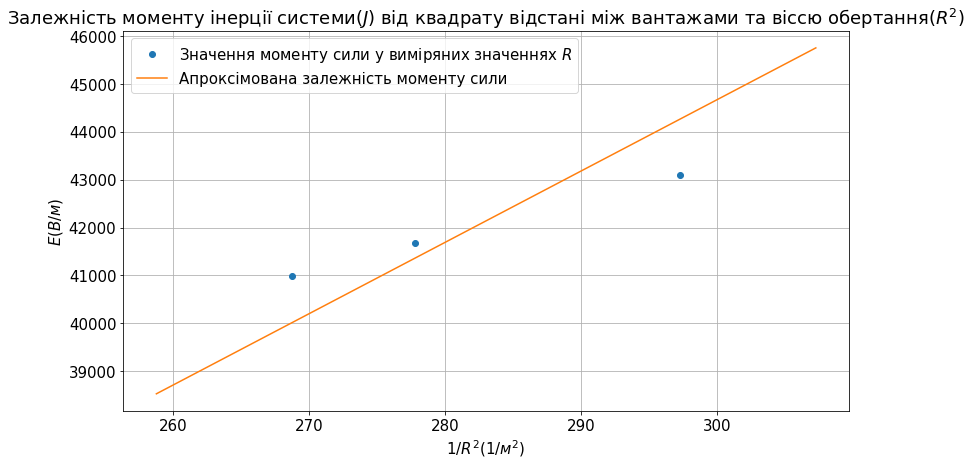

In [96]:
plt.figure(figsize = (13,7))
plt.title("Залежність моменту інерції системи($J$) від квадрату відстані між вантажами та віссю обертання($R^2$)")
plt.xlabel("$1/R^2(1/м^2)}$")
plt.rc('font', size=15)
plt.ylabel("$E(В/м)$")
plt.grid();

xnew = np.arange(np.min(R2Inv) - 10, np.max(R2Inv) + 10,0.001)
ynew = koef[0] * xnew + koef[1]

plt.plot(R2Inv, E, 'o', label = r"Значення моменту сили у виміряних значеннях $R$")
plt.plot(xnew, ynew, '-', label = "Апроксімована залежність моменту сили")
plt.legend(loc="best");

In [94]:
EExp = expData.apply(lambda row: koef[0] / row['R']**2 ,axis = 1)
print(EExp)
np.sqrt(np.divide(koef[0],E))

0    41361.406440
1    44263.098449
2    40016.410423
dtype: float64


0    0.059780
1    0.058775
2    0.060276
dtype: float64